In [95]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


In [21]:
test_url = "https://gist.githubusercontent.com/axl72/b8e8f86956a7b1d2349ac972f6aad160/raw/7cbf7d4e75d2c004ee8910973c54126920ef66c0/csv"
training_url = "https://gist.githubusercontent.com/axl72/5799cf313b2590b06caf431917e72be9/raw/3a3df50d6c8bc6a4ee8f5217d780f62f86b08822/csv"

In [37]:
training_df = pd.read_csv(training_url)
training_df.head()

,Employee ID,Date of Joining,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
0,fffe32003000360033003200,2008-09-30,Female,Service,No,2.0,3.0,3.8,0.16
1,fffe3700360033003500,2008-11-30,Male,Service,Yes,1.0,2.0,5.0,0.36
2,fffe31003300320037003900,2008-03-10,Female,Product,Yes,2.0,NaN,5.8,0.49
3,fffe32003400380032003900,2008-11-03,Male,Service,Yes,1.0,1.0,2.6,0.20
4,fffe31003900340031003600,2008-07-24,Female,Service,No,3.0,7.0,6.9,0.52


In [38]:
test_df = pd.read_csv(test_url)
test_df.head()

,Employee ID,Date of Joining,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score
0,fffe31003300390039003000,2008-12-10,Female,Service,No,2.0,5.0,7.7
1,fffe31003300310037003800,2008-08-14,Female,Product,Yes,1.0,2.0,5.2
2,fffe33003400380035003900,2008-11-13,Male,Product,Yes,1.0,3.0,5.9
3,fffe3100370039003200,2008-02-07,Female,Service,No,3.0,6.0,4.6
4,fffe32003600390036003700,2008-07-17,Female,Product,No,2.0,5.0,6.4


In [85]:
training_df.describe()
if np.issubdtype(training_df['Gender'], np.object_):
    training_df['Gender'] = training_df['Gender'].apply(lambda x: 1 if x == 'Male' else 0 if x == 'Female' else '')
training_df['Date of Joining'] = pd.to_datetime(training_df['Date of Joining'])
traninig_df = training_df.dropna()
training_df = training_df.replace(np.nan, "0")
training_df.dtypes

Employee ID                     object
Date of Joining         datetime64[ns]
Gender                           int64
Company Type                    object
WFH Setup Available             object
Designation                    float64
Resource Allocation            float64
Mental Fatigue Score           float64
Burn Rate                      float64
dtype: object

In [86]:
training_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22750 entries, 0 to 22749
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Employee ID           22750 non-null  object        
 1   Date of Joining       22750 non-null  datetime64[ns]
 2   Gender                22750 non-null  int64         
 3   Company Type          22750 non-null  object        
 4   WFH Setup Available   22750 non-null  object        
 5   Designation           22750 non-null  float64       
 6   Resource Allocation   22750 non-null  float64       
 7   Mental Fatigue Score  22750 non-null  float64       
 8   Burn Rate             22750 non-null  float64       
dtypes: datetime64[ns](1), float64(4), int64(1), object(3)
memory usage: 1.6+ MB


In [100]:
columns = ['Date of Joining', 'Designation', 'Resource Allocation', 'Mental Fatigue Score', 'Burn Rate']

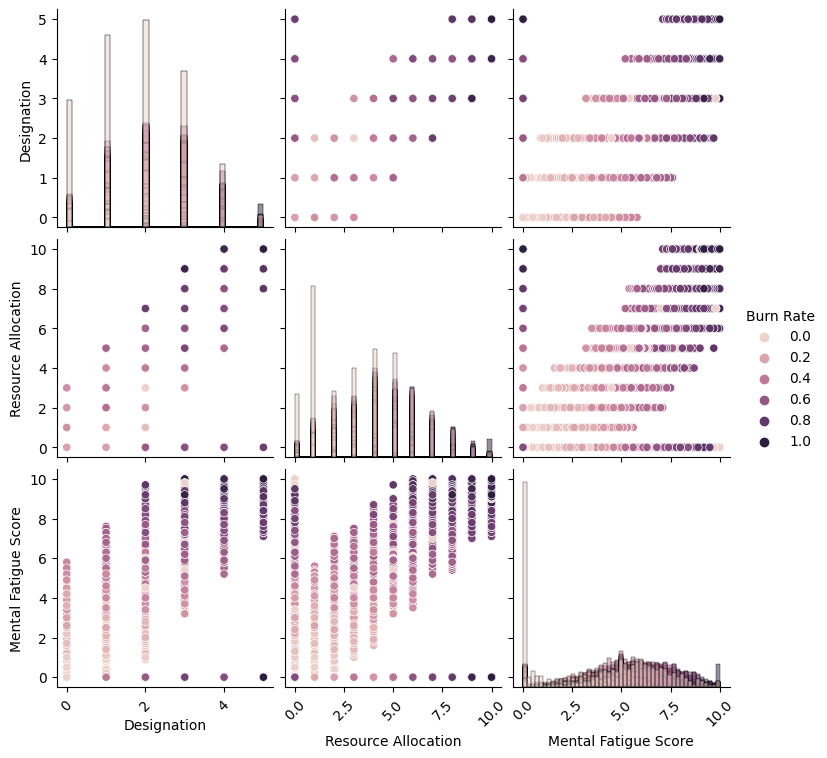

In [79]:
df = training_df[columns]
g = sns.pairplot(df, hue='Burn Rate', diag_kind="hist")
for ax in g.axes.flat:
    plt.setp(ax.get_xticklabels(), rotation=45)


In [112]:
X_list = list()

for i in ['Designation', 'Resource Allocation', 'Mental Fatigue Score']:
    print(f"Agregando Columna {i}")
    X_list.append(training_df[i].values)
    

X = np.array(X_list).T
Y = np.array(training_df['Burn Rate'])

Agregando Columna Designation
Agregando Columna Resource Allocation
Agregando Columna Mental Fatigue Score


In [115]:
reg = LinearRegression()
reg = reg.fit(X, Y)
Y_pred = reg.predict(X)
error = np.sqrt(mean_squared_error(Y, Y_pred))
r2 = reg.score(X, Y)

In [116]:
print("El error es: ", error)
print("El valor de r^2 es: ", r2)
print(f"Los coeficientes son : {reg.coef_}")


from datetime import datetime
date = datetime(2008, 3, 16)
designation = 2
resource = 1
fatigue = 5

print(f'Nivel de Burnout: ', reg.predict([[designation, resource, fatigue]]))






El error es:  0.14545596989763862
El valor de r^2 es:  0.54932475427541
Los coeficientes son : [0.05310717 0.02664315 0.0282175 ]
Nivel de Burnout:  [0.32916759]
